In [1]:
import pandas as pd

In [2]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans

In [6]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [0 0 1 ... 1 0 1]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.0330519   0.87691256  2.28112722  2.49460127  0.23082394
  -0.3169573  -0.20228287 -0.59117958  0.85780851 -0.09492563 -0.27100646
   0.20493919  0.38429509 -0.12919108 -0.27483503  0.12750334 -0.47264011
  -0.16948057 -0.08340802]
 [ 0.03890291 -0.40609458 -0.24819157 -0.25236404 -0.27045122  0.24318856
  -0.18872353  0.13969335  0.14223022 -0.14051261 -0.07684212 -0.14497573
  -0.11223498  0.02755861 -0.18780236  0.21375072 -0.22980009 -0.46718559
   0.01184481  0.03045683]
 [-0.05917995  0.82993248  0.21475742 -0.23461738 -0.26772784 -0.56580134
   0.48401728 -0.21583693 -0.09416907  0.00378005  0.18594966  0.38079048
   0.15958303 -0.18087504  0.42094502 -0.34156947  0.42197555  1.09647391
 

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.033052,0.876913,2.281127,2.494601,0.230824,-0.316957,-0.202283,-0.591180,0.857809,-0.094926,-0.271006,0.204939,0.384295,-0.129191,-0.274835,0.127503,-0.472640,-0.169481,-0.083408
1,0.038903,-0.406095,-0.248192,-0.252364,-0.270451,0.243189,-0.188724,0.139693,0.142230,-0.140513,-0.076842,-0.144976,-0.112235,0.027559,-0.187802,0.213751,-0.229800,-0.467186,0.011845,0.030457
2,-0.059180,0.829932,0.214757,-0.234617,-0.267728,-0.565801,0.484017,-0.215837,-0.094169,0.003780,0.185950,0.380790,0.159583,-0.180875,0.420945,-0.341569,0.421976,1.096474,0.031360,-0.034244


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0689bc50>,
      dtype=object)

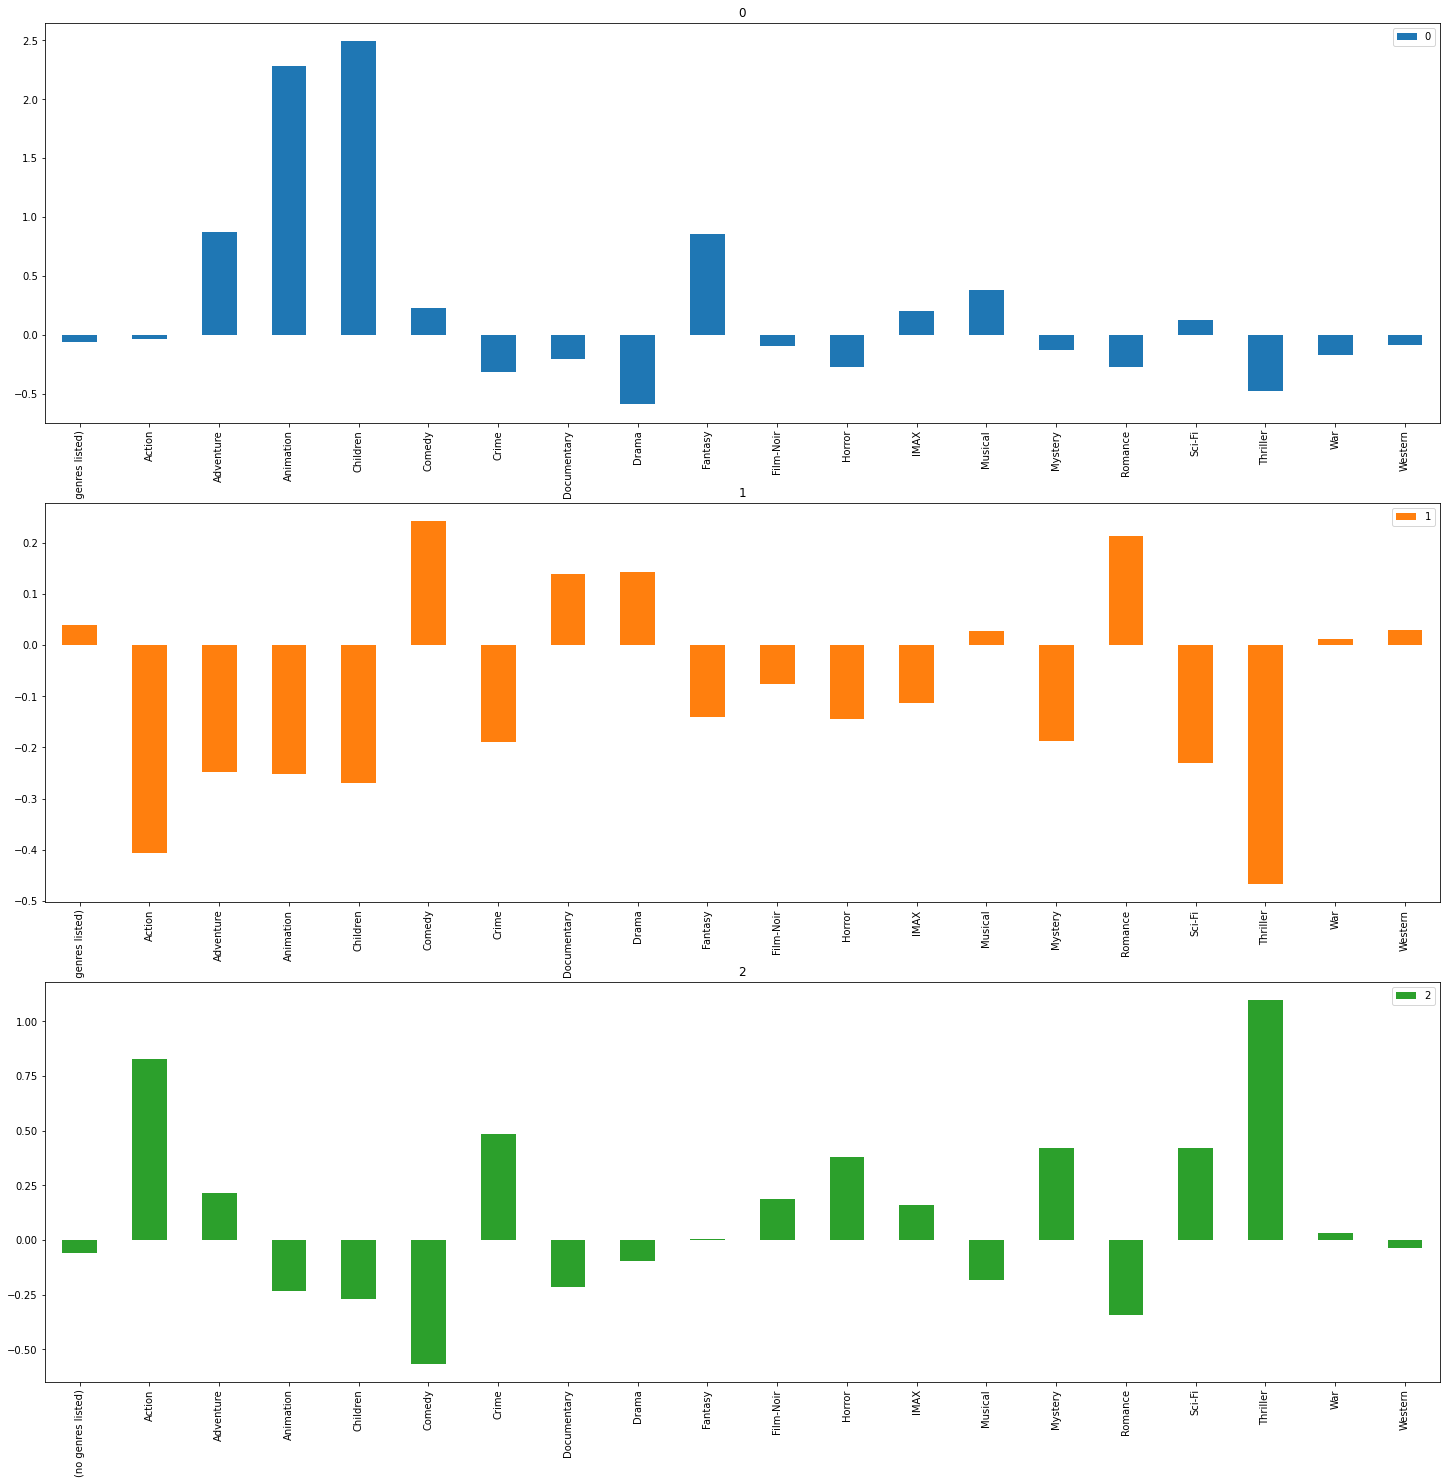

In [9]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [10]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1521,2053,"Honey, I Blew Up the Kid (1992)",Children|Comedy|Sci-Fi,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8877,134095,My Love (2006),Animation|Drama,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8899,134849,Duck Amuck (1953),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8717,126088,A Flintstones Christmas Carol (1994),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
464,531,"Secret Garden, The (1993)",Children|Drama,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1558,2095,"Shaggy D.A., The (1976)",Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3692,5092,Big Fat Liar (2002),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7467,81847,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0
7376,79224,"Karate Kid, The (2010)",Action|Children|Drama,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8930,136024,The Professional: Golgo 13 (1983),Action|Animation|Crime,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.datasets import make_blobs

In [12]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

In [13]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


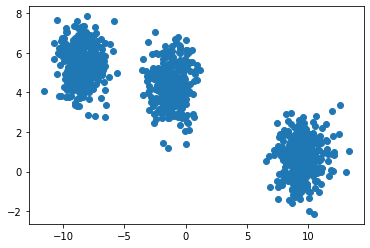

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [15]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

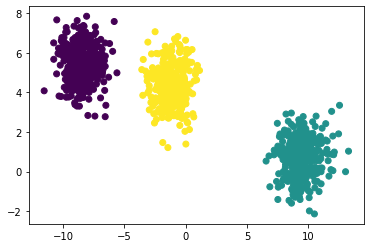

In [16]:
plt.scatter(x=dados.coluna1, y=dados.coluna2, c=grupos, cmap='viridis')

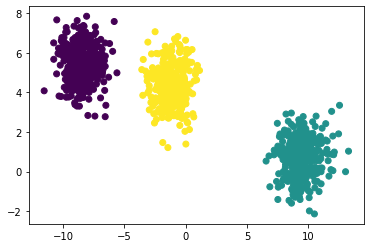

In [17]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2, c = grupos, cmap='viridis')

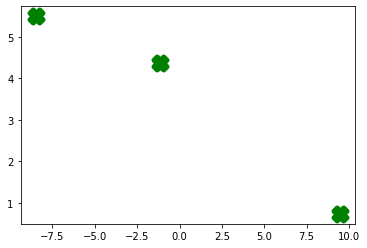

In [18]:
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

# 03 - Criando gráfico com o Seaborn


In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-43.0271   ,  46.392395 ],
       [-23.99904  ,  50.925377 ],
       [  6.176931 ,  28.544912 ],
       ...,
       [-29.640049 ,   3.3243582],
       [-20.345863 ,  30.215206 ],
       [  8.751369 ,  -7.8152595]], dtype=float32)

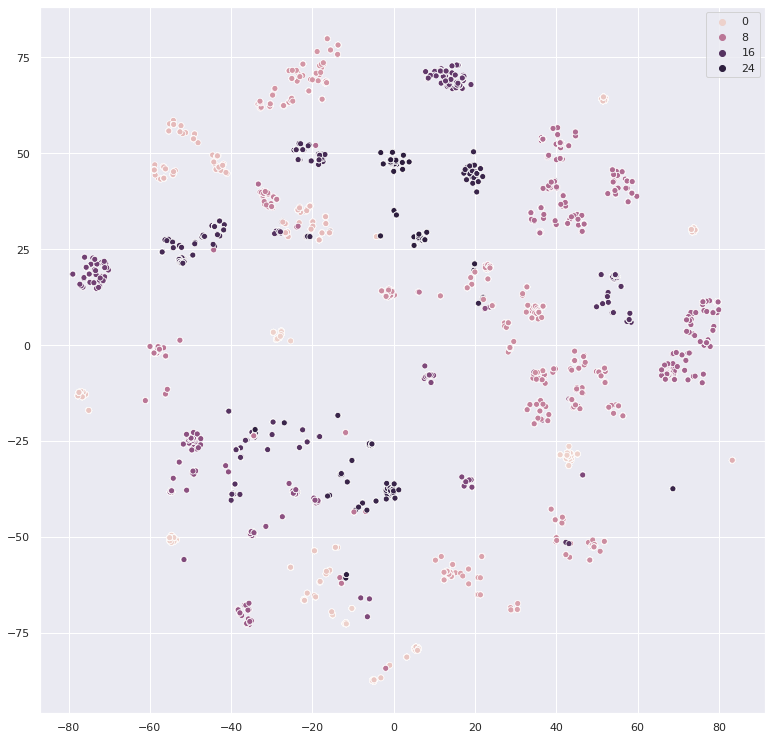

In [40]:

import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
                hue=modelo.labels_,)

# Classificando pra 20 generos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0270a390>,
      dtype=object)

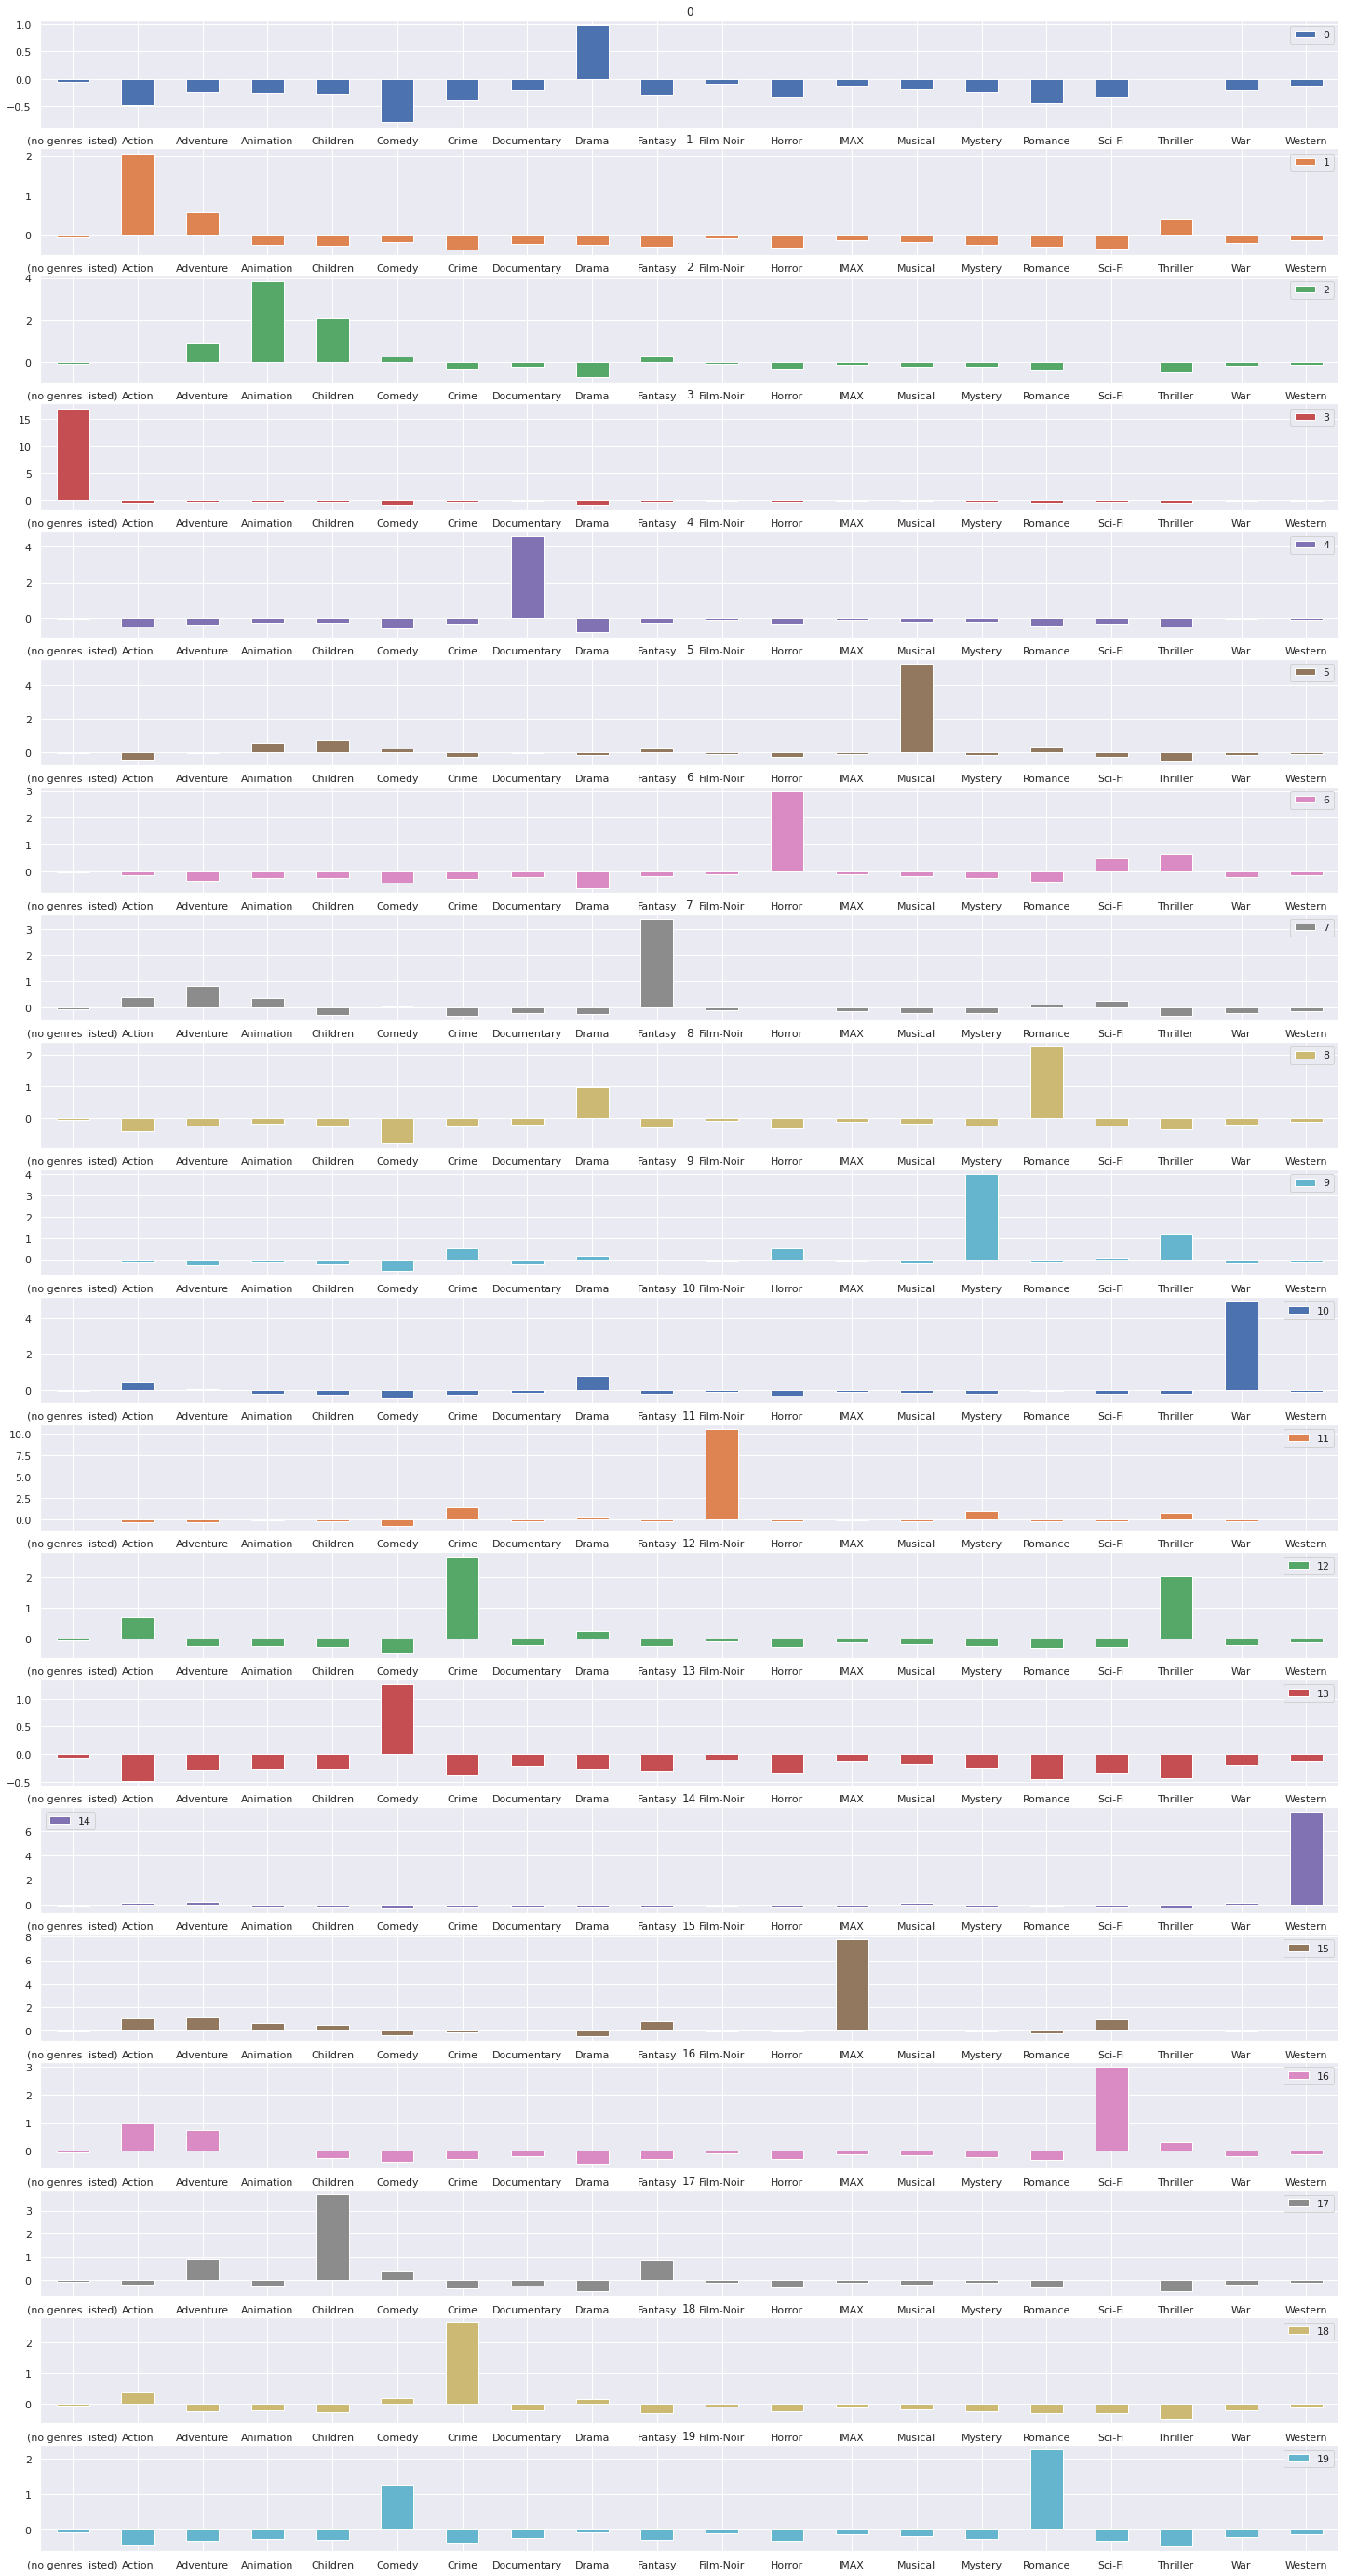

In [23]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

# Quantos grupos escolher

In [41]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [42]:
kmeans(20, generos_escalados)

[20, 53983.525895182596]

In [43]:
kmeans(3,generos_escalados)

[3, 167771.7291167479]

In [44]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 166516.51490402213],
 [4, 157251.84219128184],
 [5, 146393.56735523537],
 [6, 138503.08662091626],
 [7, 128107.57591787865],
 [8, 118709.19279048432],
 [9, 110282.72396060133],
 [10, 102667.05462550133],
 [11, 97275.25935889114],
 [12, 87930.7008195468],
 [13, 80437.57672220288],
 [14, 71834.25340495432],
 [15, 68400.2726582335],
 [16, 65208.0317930648],
 [17, 62003.90071120031],
 [18, 59624.48611302734],
 [19, 58065.02841337649],
 [20, 55528.82695155824],
 [21, 53449.58278736021],
 [22, 52296.10897305958],
 [23, 50950.16465572179],
 [24, 49096.869154100954],
 [25, 48132.16576738366],
 [26, 46189.608368657704],
 [27, 45273.84291762259],
 [28, 44743.64405402562],
 [29, 44099.209379342414],
 [30, 42764.9533348164],
 [31, 42547.150215470574],
 [32, 40852.96188225684],
 [33, 40408.64834542415],
 [34, 39162.7778299524],
 [35, 38609.884539813334],
 [36, 37882.25449522565],
 [37, 37358.32372501573],
 [38, 36380.245801776284],
 [39, 36351.99138249

In [49]:
resultado = pd.DataFrame(resultado,
             columns=['grupos','inertia'])

In [50]:
resultado

,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,166516.514904
3,4,157251.842191
4,5,146393.567355
5,6,138503.086621
6,7,128107.575918
7,8,118709.192790
8,9,110282.723961
9,10,102667.054626


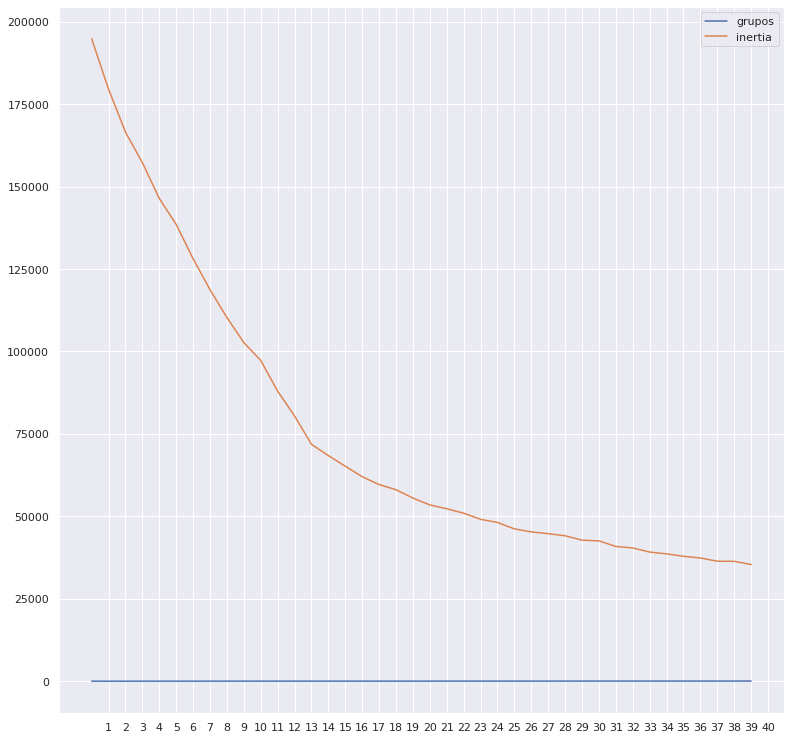

In [53]:
resultado.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efcf8e24a90>,
      dtype=object)

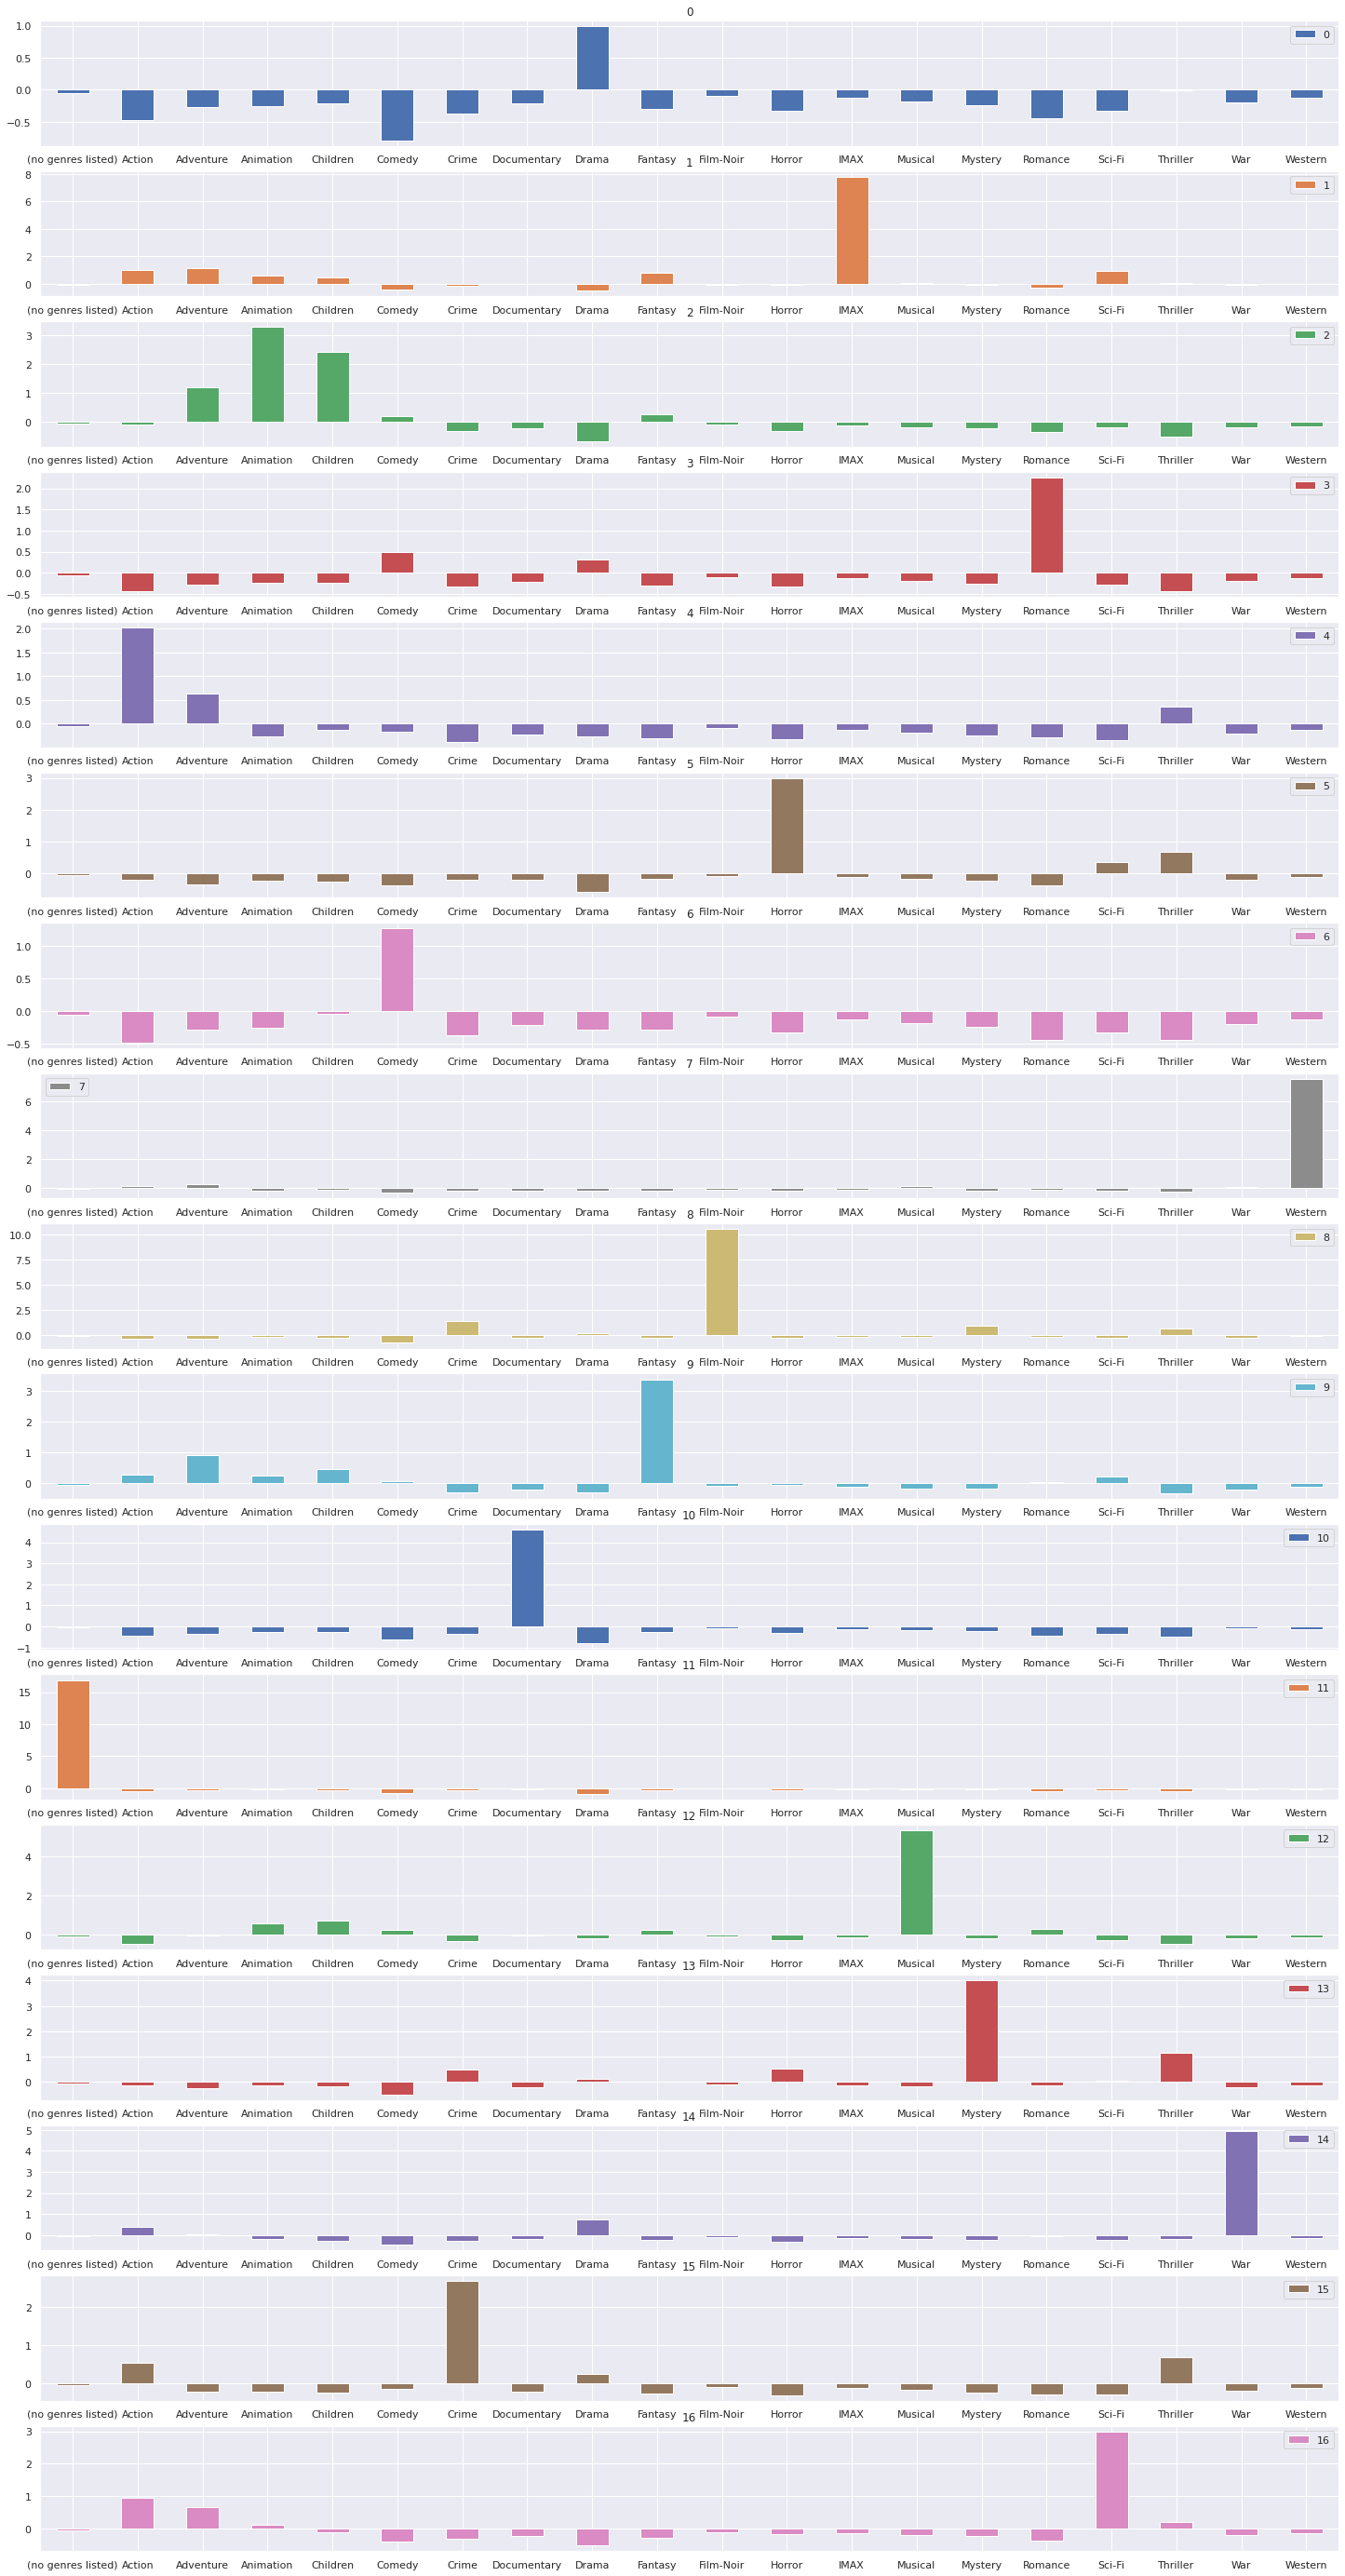

In [54]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [55]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5941,34292,Hardware (1990),Action|Horror|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8691,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6862,62376,City of Ember (2008),Adventure|Children|Sci-Fi,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1442,1965,Repo Man (1984),Comedy|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1978,2625,Black Mask (Hak hap) (1996),Action|Adventure|Crime|Sci-Fi|Thriller,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
9392,164179,Arrival (2016),Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4685,6996,Highlander II: The Quickening (1991),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5685,27728,Ghost in the Shell 2: Innocence (a.k.a. Innoce...,Action|Animation|Drama|Sci-Fi|Thriller,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
8322,107406,Snowpiercer (2013),Action|Drama|Sci-Fi,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3927,5523,"Adventures of Pluto Nash, The (2002)",Action|Adventure|Comedy|Sci-Fi,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [58]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 49.030792  ,   5.074329  ],
       [-55.109352  ,  -2.7541075 ],
       [-33.487972  ,  -0.92536163],
       ...,
       [ -0.79238707, -14.060672  ],
       [ 26.714708  ,   4.371514  ],
       [  0.16472839,  26.7216    ]], dtype=float32)

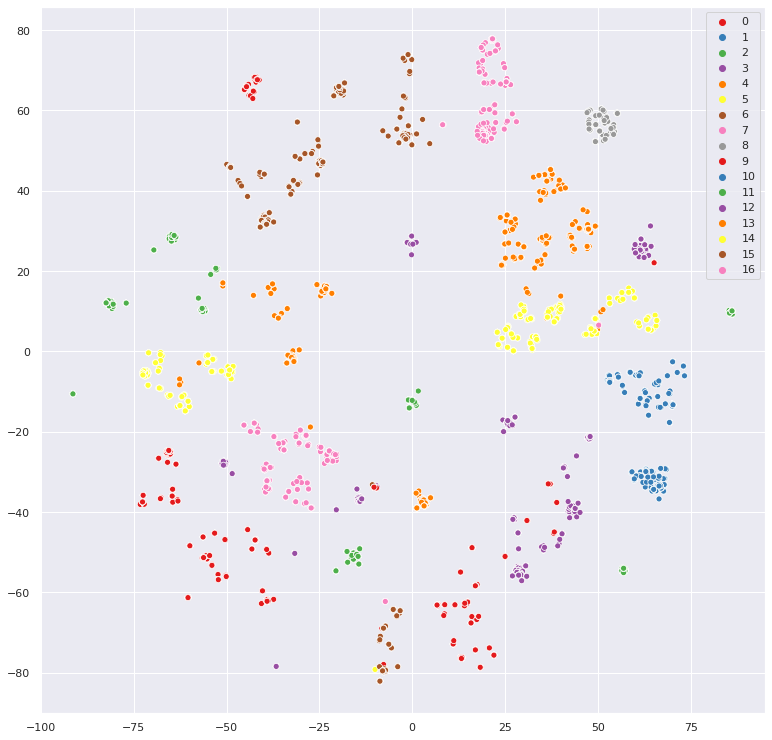

In [60]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos,
                palette = sns.color_palette('Set1',17))

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efcf83b21d0>,
      dtype=object)

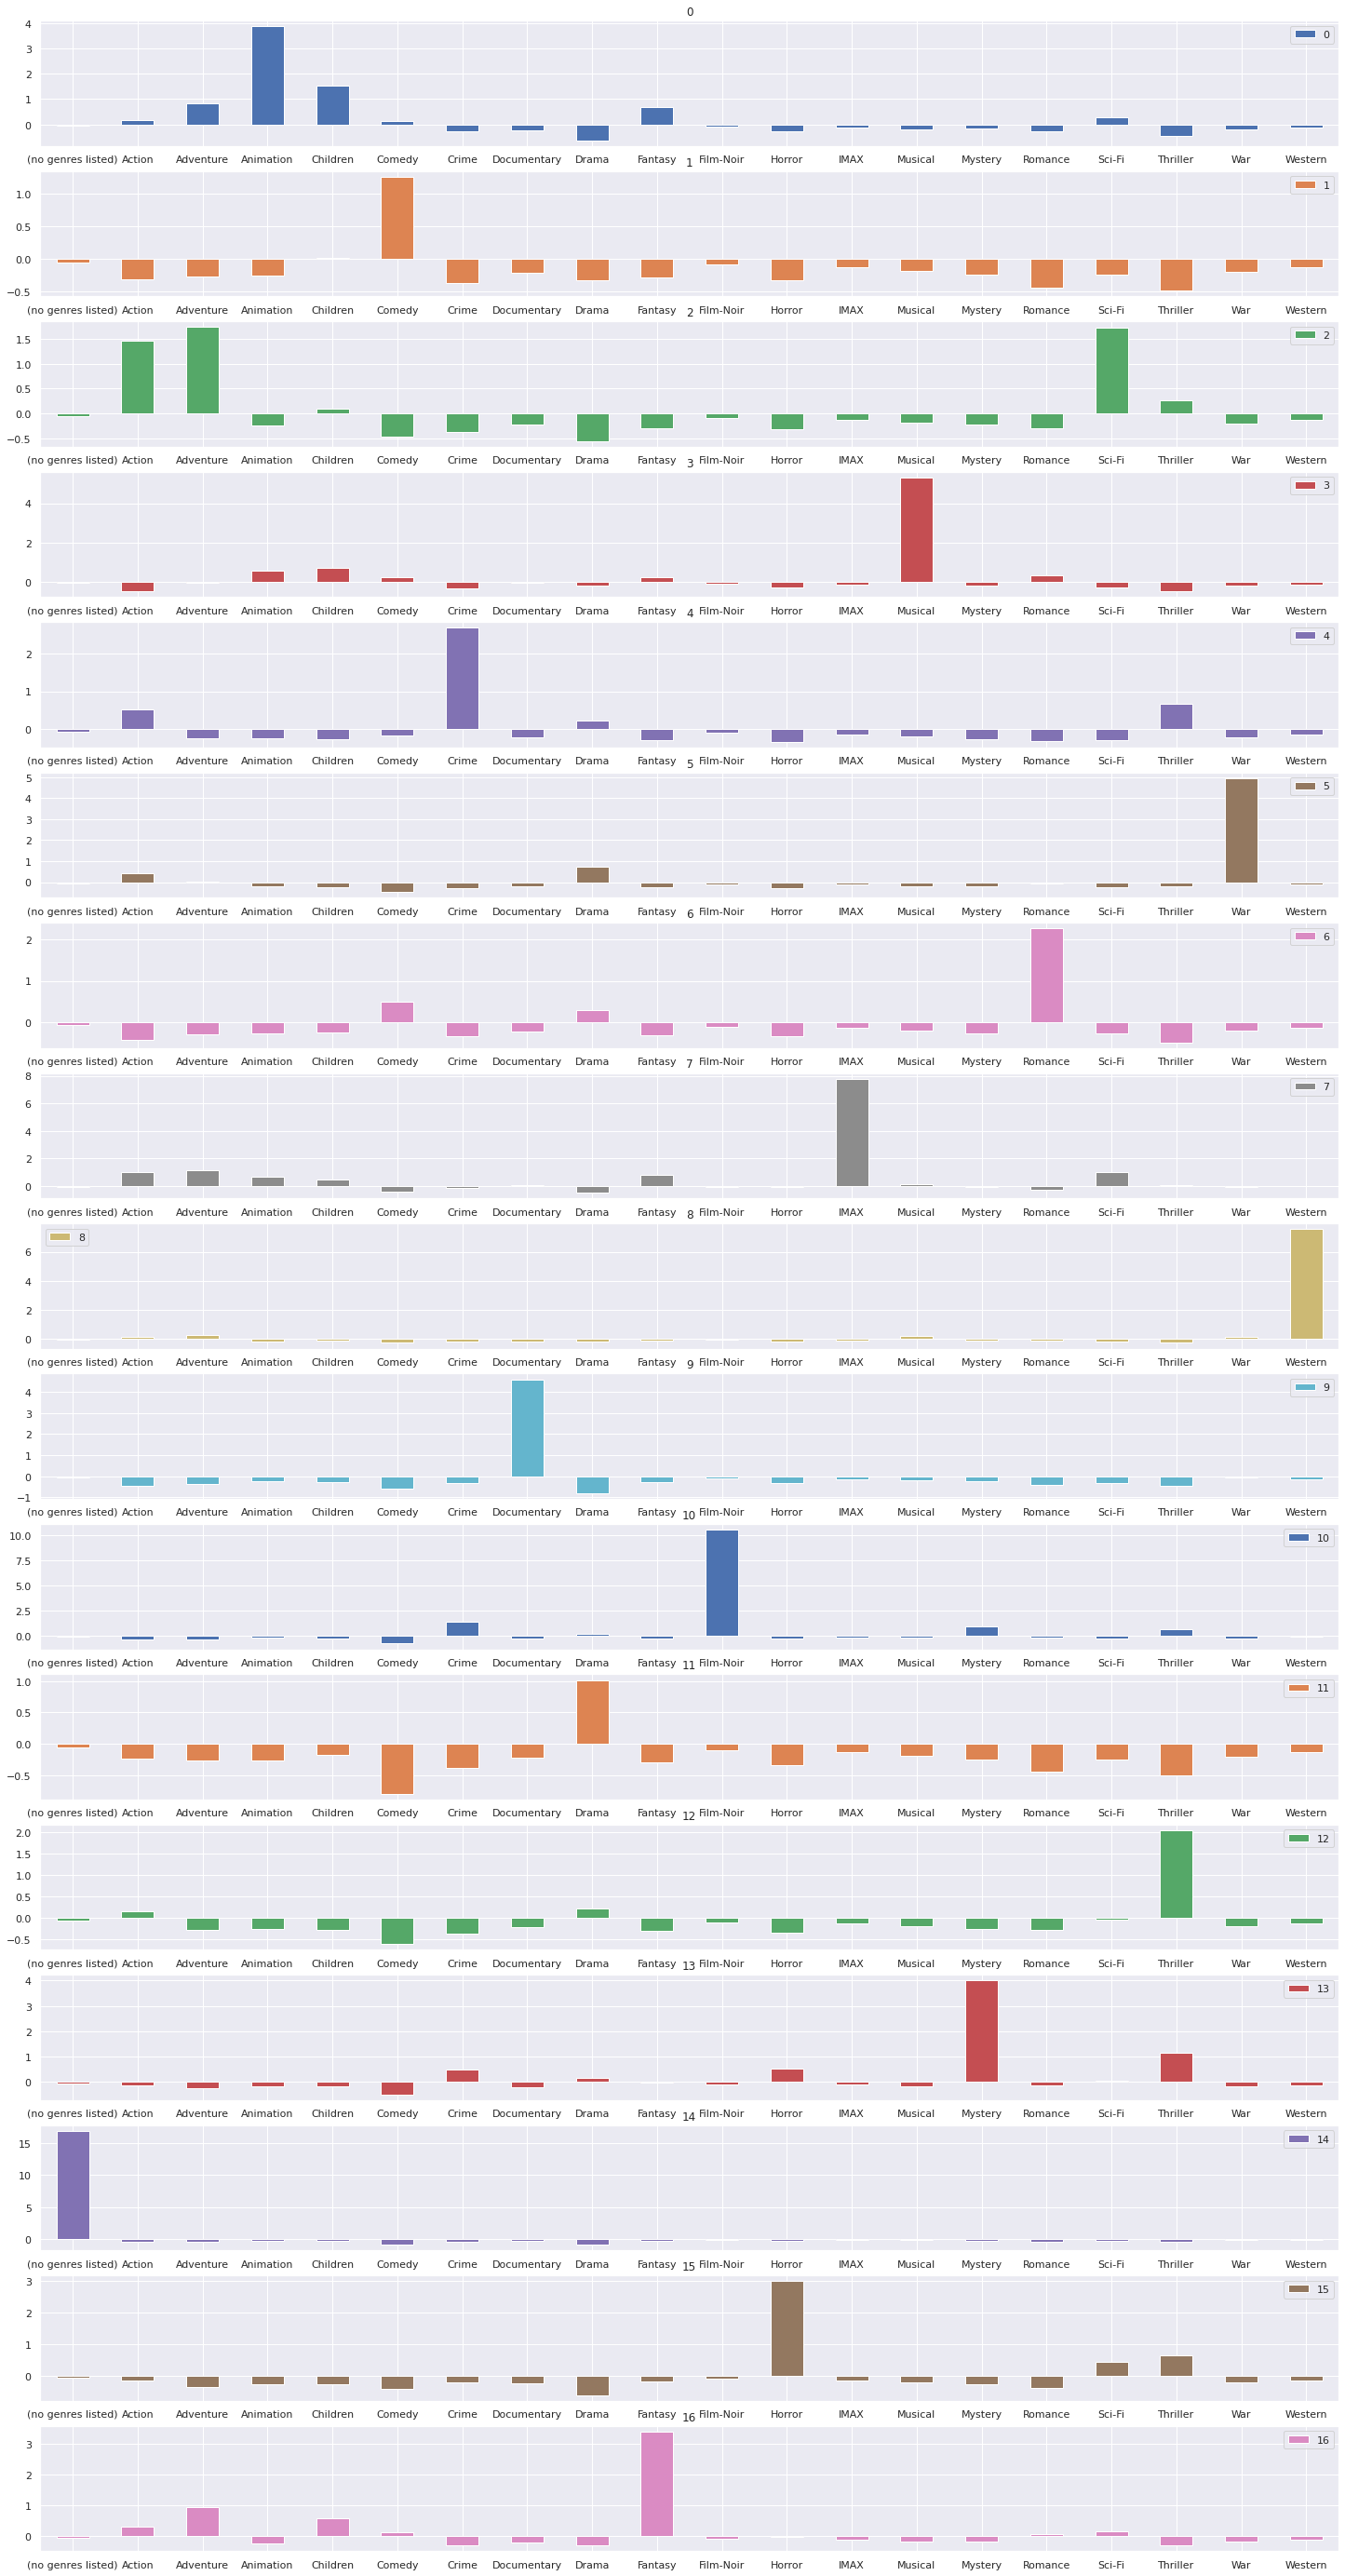

In [63]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [64]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        , 11.        ,  2.4577169 ,  2.        ],
       [12.        , 17.        ,  2.70164191,  3.        ],
       [ 6.        , 18.        ,  2.88722416,  4.        ],
       [ 4.        , 19.        ,  3.39725623,  5.        ],
       [ 2.        , 20.        ,  3.58150002,  6.        ],
       [15.        , 21.        ,  3.75364161,  7.        ],
       [16.        , 22.        ,  4.19246236,  8.        ],
       [13.        , 23.        ,  4.53043647,  9.        ],
       [ 0.        , 24.        ,  4.85271505, 10.        ],
       [ 9.        , 25.        ,  5.16220801, 11.        ],
       [ 5.        , 26.        ,  5.24164629, 12.        ],
       [ 3.        , 27.        ,  5.78452052, 13.        ],
       [ 8.        , 28.        ,  7.86826323, 14.        ],
       [ 7.        , 29.        ,  8.14050654, 15.        ],
       [10.        , 30.        , 10.81639197, 16.        ],
       [14.        , 31.        , 17.06747779, 17.        ]])

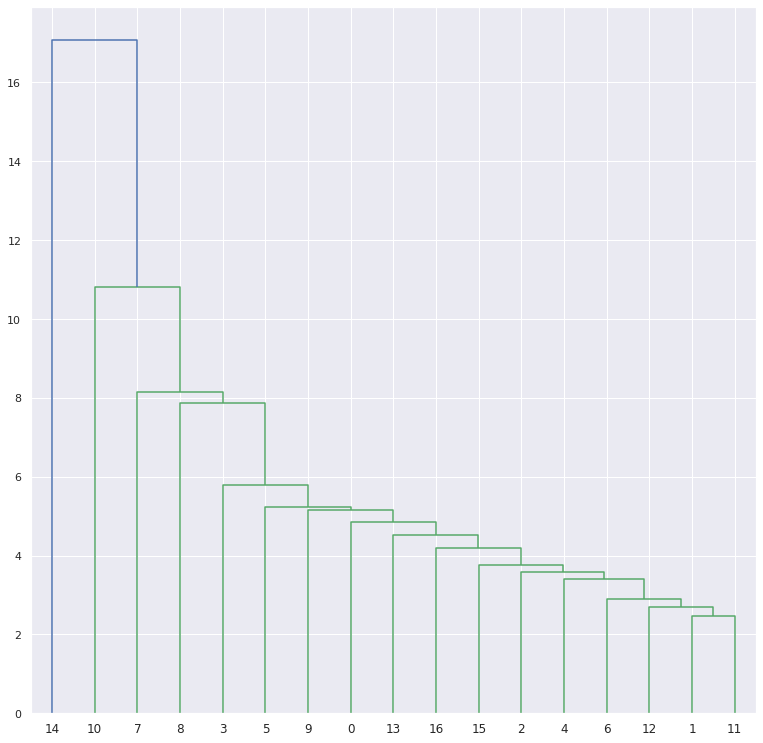

In [66]:
dendrograma = dendrogram(matriz_de_distancia)